In [1]:
# Load libraries to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset and replace all fields with ? to NaN values

automobile = pd.read_csv('automobile.txt')

In [2]:
# Get dataset info 

automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
# View first 5 records in the dataset to visualize the type of data and incosistencies the dataset might contain
# we notice that there is a special current in some the columns that pandas does not recoginze we need to clean our dataset

automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Statistics of the Dataset

automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
# Cleaning the dataset
# find out if there are any null values
# get count of NaN values in each column, there is a special character ? that Pandas does not recognize

automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
# replacing the special character ? with the average of the normalized-losses column and convert to integer dataType

nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)

In [7]:
# replacing the special character ? with the average price and convert the datatype to integer

price = automobile['price'].loc[automobile['price'] != '?']
price_mean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',price_mean).astype(int)

In [29]:
# Checking if horse power is numeric and non numberic fields with average horsepower and convert the datatype to integer

horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
horsepower_mean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',horsepower_mean).astype(int)
automobile.loc[automobile['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [9]:
# view changes to the first 20 records on the dataset, to ensure the dataset was cleaned properly

automobile.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,13207


In [10]:
# Replace the non-numeric value to null and conver the datatype

automobile['bore'] = pd.to_numeric(automobile['bore'],errors='coerce')

# Replace the non-numeric value to null and convert the datatype

automobile['stroke'] = pd.to_numeric(automobile['stroke'],errors='coerce')

# Convert the non-numeric data to null and convert the datatype

automobile['peak-rpm'] = pd.to_numeric(automobile['peak-rpm'],errors='coerce')

In [11]:
# Remove records which are having ? in the number of doors column if there are any

print(automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?'])
automobile = automobile[automobile['num-of-doors'] != '?']
automobile['num-of-doors'].loc[automobile['num-of-doors'] == '?']

27    ?
63    ?
Name: num-of-doors, dtype: object


Series([], Name: num-of-doors, dtype: object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    int64  
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non

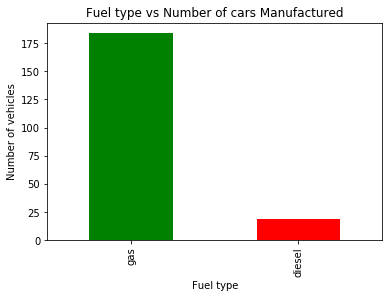

In [17]:
# Data Visualization
# bar graph to show number of automobiles manufactured that use gas and diesel 

automobile['fuel-type'].value_counts().plot(kind='bar',color=['green', 'red'])
plt.title("Fuel type vs Number of cars Manufactured")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

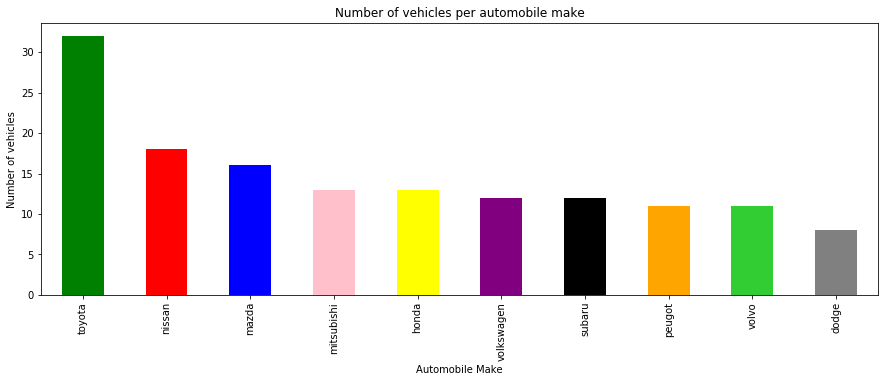

In [19]:
# bar graph to show top 10 number of automobiles manufactured per make

automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5),color=['green', 'red','blue','pink','yellow','purple','black','orange','limegreen','grey'])
plt.title("Number of vehicles per automobile make")
plt.ylabel('Number of vehicles')
plt.xlabel('Automobile Make');

Text(0.5, 1.0, 'Turbo charged vs  Standard automobiles manufactured (%)')

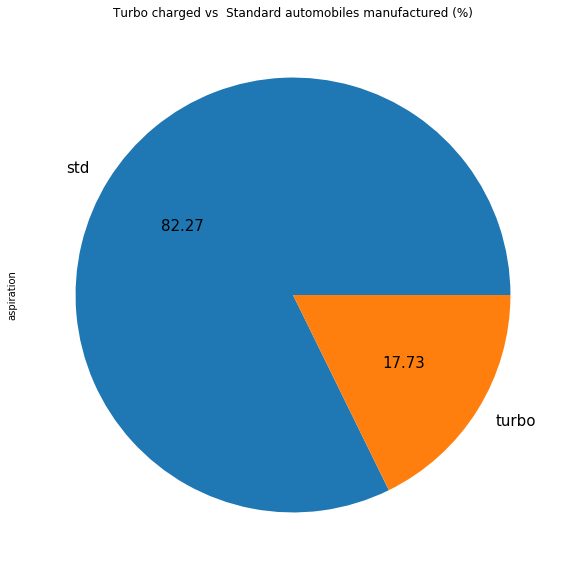

In [24]:
# piechart to show std automobiles and those that have a turbo

automobile['aspiration'].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f',fontsize=15)
plt.title("Turbo charged vs  Standard automobiles manufactured (%)")


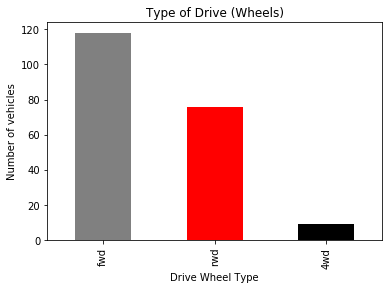

In [27]:
# visualize number of automobiles vs type of wheels drive

automobile['drive-wheels'].value_counts().plot(kind='bar',color=['grey','red','black'])
plt.title("Type of Drive (Wheels)")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive Wheel Type');

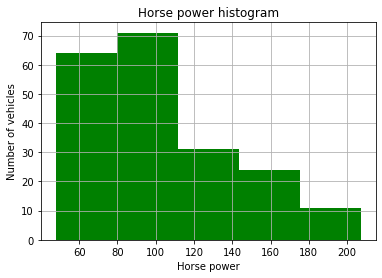

In [33]:
# Histograph showing number of automobiles produced according to horse power

automobile.horsepower[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())].hist(bins=5,color='green');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

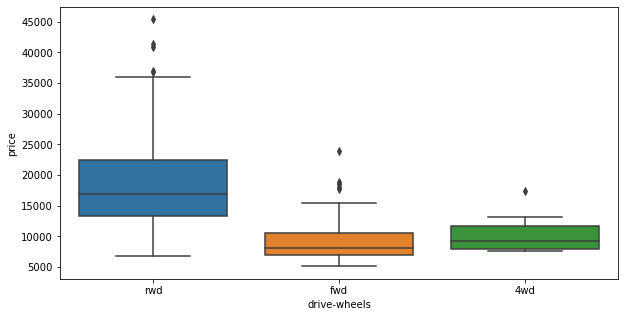

In [34]:
# Data Correlation in our DataSet

# Data visualization below shows that rwd is more expensive, fwd least expensive with 4wd data being little to tell if is expensive or least expensive

plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


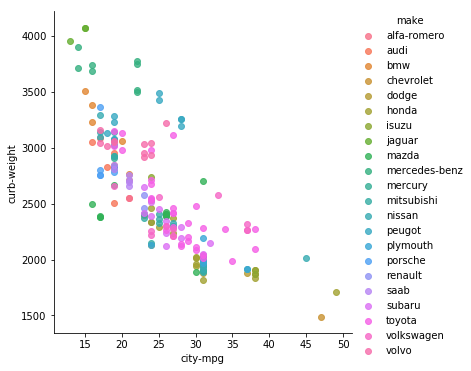

In [42]:
# the visualization shows that the more heavier the car weight the less it travels in the city
# which is idea because most people prefer smaller cars to travel in the city "for day to day travel"

plot_city = sns.lmplot('city-mpg',"curb-weight", automobile, hue="make", fit_reg=False);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


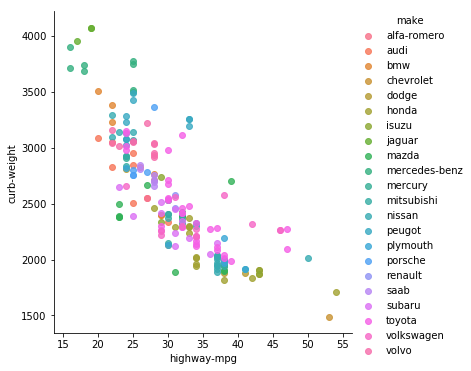

In [41]:
# the visualization shows that the more heaveir the car weight the less it travels on the highway
# small weight cars travel more on the freeway as depicted by the mileage

plot_highway = sns.lmplot('highway-mpg',"curb-weight", automobile, hue="make",fit_reg=False);

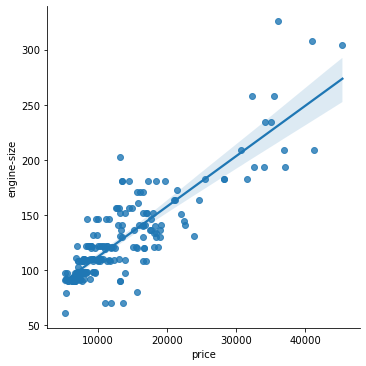

In [47]:
# scatter plot
# The bigger the Engine the higher price of the vehicle

scatter_plot= sns.lmplot('price',"engine-size", automobile);